In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
dt=pd.read_csv("Salary_Data.csv")
dt.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


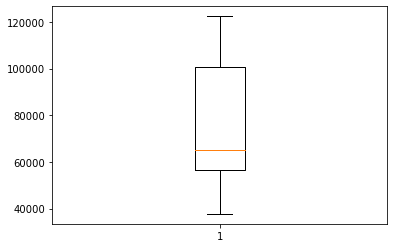

In [2]:
plt.boxplot(dt.Salary)
dt.describe()

In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
dt.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <BarContainer object of 10 artists>)

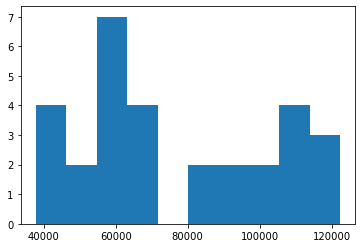

In [5]:
plt.hist(dt.Salary)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f865eeb880>,
 'caps': [<matplotlib.lines.Line2D at 0x1f865eebf40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f865eeb520>],
 'medians': [<matplotlib.lines.Line2D at 0x1f865ef65e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f865ef6940>],
 'means': []}

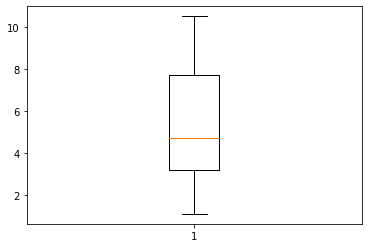

In [6]:
plt.boxplot(dt.YearsExperience)

(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <BarContainer object of 10 artists>)

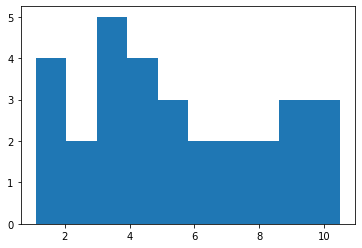

In [7]:
plt.hist(dt.YearsExperience)

In [8]:
dt.YearsExperience.corr(dt.Salary)

0.9782416184887599

In [9]:
import statsmodels.formula.api as smf
model=smf.ols("YearsExperience~Salary",data=dt).fit()
model.params 

Intercept   -2.383161
Salary       0.000101
dtype: float64

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 12 Sep 2021   Prob (F-statistic):           1.14e-20
Time:                        17:21:01   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
print(model.resid)
print(model.resid_pearson)

0    -0.500934
1    -0.995819
2     0.062306
3    -0.024427
4     0.543572
5    -0.452729
6    -0.707969
7     0.069752
8    -0.942905
9     0.291879
10   -0.118652
11    0.733144
12    0.615372
13    0.702815
14    0.694715
15    0.403374
16    0.796690
17   -0.730801
18    0.043883
19   -1.129735
20   -0.106748
21   -0.468520
22    0.024747
23   -0.942087
24    0.001558
25    0.691330
26    0.038218
27    0.577103
28    0.289155
29    0.541712
dtype: float64
[-0.83601202 -1.6619283   0.1039828  -0.04076678  0.90717063 -0.75556182
 -1.18153318  0.11640909 -1.5736192   0.48711814 -0.19801879  1.22354877
  1.02699848  1.1729327   1.15941355  0.67319349  1.32960101 -1.21963712
  0.07323614 -1.88542188 -0.17815314 -0.78191494  0.0413     -1.5722537
  0.00260051  1.15376408  0.06378169  0.96313051  0.48257285  0.90406645]


In [14]:
print(model.conf_int(0.05))

                  0         1
Intercept -3.053603 -1.712718
Salary     0.000093  0.000110


In [15]:
pred=model.predict(dt.iloc[:,1])
pred
pd.set_option("display.max_rows",None)
pred
rmse_lin=np.sqrt(np.mean((np.array(dt['YearsExperience'])-np.array(pred))**2))
rmse_lin

0.5788774181748743

Text(0, 0.5, 'YE')

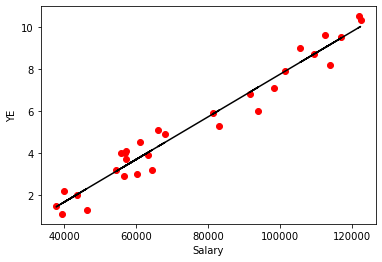

In [17]:
import matplotlib.pylab as plt
plt.scatter(x=dt['Salary'],y=dt['YearsExperience'],color='red')
plt.plot(dt['Salary'],pred,color='black')
plt.xlabel('Salary')
plt.ylabel('YE')

In [18]:
model2 = smf.ols('YearsExperience~np.log(Salary)',data=dt).fit()
model2.params
model2.resid 
model2.resid_pearson 

array([ 0.26370944, -1.05623728,  1.20726632,  0.46224564,  1.58751689,
       -0.94071292, -1.40055309, -0.15235096, -1.81521686,  0.02648701,
       -0.69641723,  0.66826189,  0.46481552,  0.57611664,  0.43434472,
       -0.07904074,  0.46752248, -1.53322923, -0.52985412, -1.81456347,
       -0.51867404, -0.79903179, -0.0364198 , -0.78647513,  0.26436366,
        1.01571098,  0.66941655,  1.1745008 ,  1.28454843,  1.5919497 ])

In [19]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Sun, 12 Sep 2021   Prob (F-statistic):           7.03e-18
Time:                        17:25:17   Log-Likelihood:                -33.035
No. Observations:                  30   AIC:                             70.07
Df Residuals:                      28   BIC:                             72.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -77.6961      4.241    -18.322      0.000     -86.383     -69.009
np.log(Salary)     7.4288      0.379     19.585      0.000       6.652       8.206
==============================================================================
Omnibus:                        1.748   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.417   Jarque-Bera (JB):                1.213
Skew:                          -0.227   Prob(JB):                        0.545
Kurtosis:                       2.126   Cond. No.                         347.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
pred2 = model2.predict(pd.DataFrame(dt['Salary'])) 

In [21]:
pred2
rmse_log=np.sqrt(np.mean((np.array(dt['YearsExperience'])-np.array(pred2))**2))
rmse_log

0.7277682036871286

In [22]:
pred2.corr(dt.YearsExperience)

0.9653844412504374

Text(0, 0.5, 'YearsExperience')

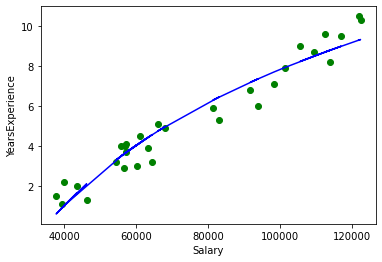

In [33]:
plt.scatter(x=dt['Salary'],y=dt['YearsExperience'],color='green')
plt.plot(dt['Salary'],pred2,color='blue')
plt.xlabel('Salary')
plt.ylabel('YearsExperience')

In [24]:
model3=smf.ols('np.log(YearsExperience)~Salary',data=dt).fit()
model3.params

Intercept   -0.094207
Salary       0.000021
dtype: float64

In [25]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     np.log(YearsExperience)   R-squared:                       0.854
Model:                                 OLS   Adj. R-squared:                  0.849
Method:                      Least Squares   F-statistic:                     163.6
Date:                     Sun, 12 Sep 2021   Prob (F-statistic):           3.25e-13
Time:                             17:33:13   Log-Likelihood:                0.92814
No. Observations:                       30   AIC:                             2.144
Df Residuals:                           28   BIC:                             4.946
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0942      0.133     -0.710      0.483      -0.366       0.178
Salary      2.104e-05   1.64e-06     12.792      0.000    1.77e-05    2.44e-05
==============================================================================
Omnibus:                        7.529   Durbin-Watson:                   0.461
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                5.772
Skew:                          -0.923   Prob(JB):                       0.0558
Kurtosis:                       4.099   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
pred_log=model3.predict(pd.DataFrame(dt['Salary']))

In [27]:
pred_log

0     0.733613
1     0.877997
2     0.699694
3     0.821607
4     0.745143
5     1.097602
6     1.171414
7     1.051375
8     1.261786
9     1.109112
10    1.235969
11    1.079760
12    1.104230
13    1.106839
14    1.191635
15    1.335282
16    1.295115
17    1.654055
18    1.617759
19    1.882393
20    1.836060
21    1.973564
22    2.037297
23    2.300521
24    2.208340
25    2.127353
26    2.366948
27    2.275756
28    2.481032
29    2.470112
dtype: float64

In [28]:
pred3=np.exp(pred_log)
pred3

0      2.082591
1      2.406075
2      2.013138
3      2.274150
4      2.106743
5      2.996972
6      3.226553
7      2.861583
8      3.531723
9      3.031665
10     3.441710
11     2.943971
12     3.016901
13     3.024783
14     3.292460
15     3.801069
16     3.651416
17     5.228136
18     5.041779
19     6.569203
20     6.271779
21     7.196275
22     7.669850
23     9.979380
24     9.100597
25     8.392621
26    10.664790
27     9.735272
28    11.953599
29    11.823772
dtype: float64

In [29]:
rmse_exp=np.sqrt(np.mean((np.array(dt['YearsExperience'])-np.array(pred3))**2))
rmse_exp

0.8649536763615343

In [30]:
pred3.corr(dt.YearsExperience)

0.9638344291144741

Text(0, 0.5, 'YearsExperience')

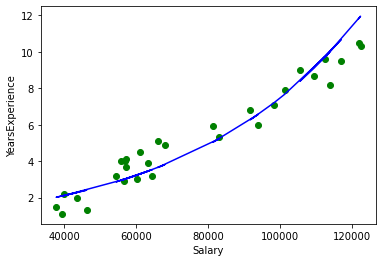

In [35]:
plt.scatter(x=dt['Salary'],y=dt['YearsExperience'],color='green')
plt.plot(dt.Salary,pred3,color='blue')
plt.xlabel('Salary')
plt.ylabel('YearsExperience')

In [36]:
student_resid=model3.resid_pearson
student_resid

array([-2.62856286, -2.53520584, -1.21165179, -0.52900213,  0.1783699 ,
       -0.13544939, -0.29980314,  0.46029816, -0.40618444,  0.82040237,
        0.51478963,  1.26232636,  1.16155444,  1.25249551,  1.28665421,
        1.0457908 ,  1.37594637,  0.05621983,  0.64733073, -0.37323186,
        0.33299592, -0.05546522,  0.12175325, -0.80873095, -0.18538208,
        0.28773542, -0.47627671, -0.05762179, -0.61313045, -0.48896426])

Text(0, 0.5, 'Standardized Residual')

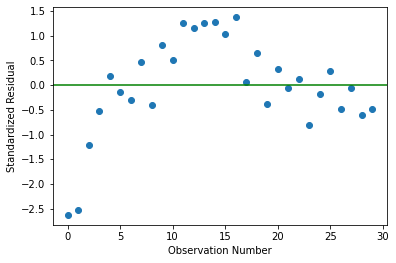

In [37]:
plt.plot(model3.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

Text(0, 0.5, 'Actual')

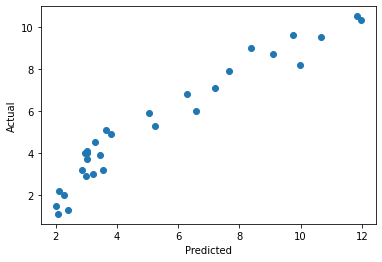

In [38]:
plt.scatter(x=pred3,y=dt.YearsExperience)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [39]:
dt["Salary_Sq"] = dt.Salary*dt.Salary
dt  

,YearsExperience,Salary,Salary_Sq
0,1.1,39343.0,1.547872e+09
1,1.3,46205.0,2.134902e+09
2,1.5,37731.0,1.423628e+09
3,2.0,43525.0,1.894426e+09
4,2.2,39891.0,1.591292e+09
5,2.9,56642.0,3.208316e+09
6,3.0,60150.0,3.618022e+09
7,3.2,54445.0,2.964258e+09
8,3.2,64445.0,4.153158e+09
9,3.7,57189.0,3.270582e+09


In [40]:
model_quad = smf.ols("np.log(YearsExperience)~Salary+Salary_Sq",data=dt).fit()
model_quad.params 

Intercept   -1.536857e+00
Salary       6.153230e-05
Salary_Sq   -2.513940e-10
dtype: float64

In [41]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     np.log(YearsExperience)   R-squared:                       0.907
Model:                                 OLS   Adj. R-squared:                  0.901
Method:                      Least Squares   F-statistic:                     132.3
Date:                     Sun, 12 Sep 2021   Prob (F-statistic):           1.12e-14
Time:                             17:52:07   Log-Likelihood:                 7.7666
No. Observations:                       30   AIC:                            -9.533
Df Residuals:                           27   BIC:                            -5.330
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5369      0.381     -4.036      0.000      -2.318      -0.755
Salary      6.153e-05   1.03e-05      5.951      0.000    4.03e-05    8.27e-05
Salary_Sq  -2.514e-10   6.37e-11     -3.949      0.001   -3.82e-10   -1.21e-10
==============================================================================
Omnibus:                        3.765   Durbin-Watson:                   1.047
Prob(Omnibus):                  0.152   Jarque-Bera (JB):                2.504
Skew:                          -0.687   Prob(JB):                        0.286
Kurtosis:                       3.340   Cond. No.                     8.31e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.31e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
pred_quad = model_quad.predict(dt)
pred4=np.exp(pred_quad)  # as we have used log(AT) in preparing model so we need to convert it back
pred4
rmse_quad = np.sqrt(np.mean((np.array(dt['YearsExperience'])-np.array(pred4))**2))
rmse_quad  

0.7214302704516442

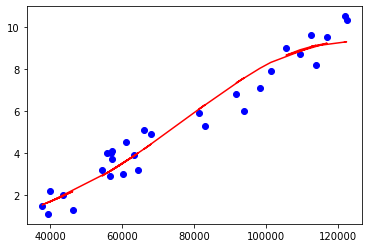

In [43]:
plt.scatter(dt.Salary,dt.YearsExperience,c="b")
plt.plot(dt.Salary,pred4,"r") 

ValueError: x and y must be the same size

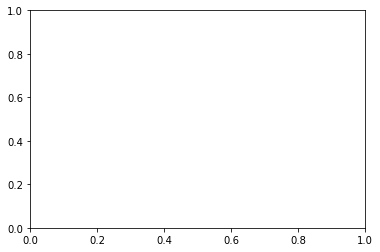

In [44]:
plt.scatter(np.arange(10),model_quad.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

(array([1., 1., 0., 2., 3., 4., 6., 5., 2., 6.]),
 array([-2.57602945, -2.17996878, -1.78390811, -1.38784744, -0.99178677,
        -0.59572611, -0.19966544,  0.19639523,  0.5924559 ,  0.98851657,
         1.38457724]),
 <BarContainer object of 10 artists>)

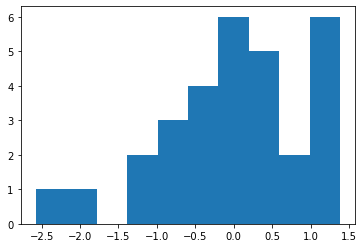

In [45]:
plt.hist(model_quad.resid_pearson)

In [46]:
data = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_quad"]),
        "RMSE_Values":pd.Series([rmse_lin,rmse_log,rmse_exp,rmse_quad]),
        "Rsquare":pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model_quad.rsquared])}
table=pd.DataFrame(data)
table 

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,0.578877,0.956957
1,rmse_log,0.727768,0.931967
2,rmse_exp,0.864954,0.853889
3,rmse_quad,0.721430,0.907383


In [47]:
print(plt.style.available) 

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [48]:
import matplotlib.pyplot as plt
>>> plt.style.use('dark_background')  

(array([1., 1., 0., 2., 3., 4., 6., 5., 2., 6.]),
 array([-2.57602945, -2.17996878, -1.78390811, -1.38784744, -0.99178677,
        -0.59572611, -0.19966544,  0.19639523,  0.5924559 ,  0.98851657,
         1.38457724]),
 <BarContainer object of 10 artists>)

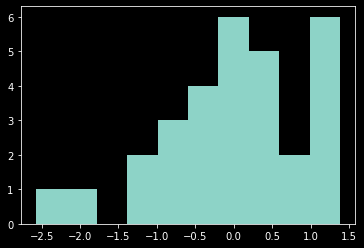

In [49]:
plt.hist(model_quad.resid_pearson)

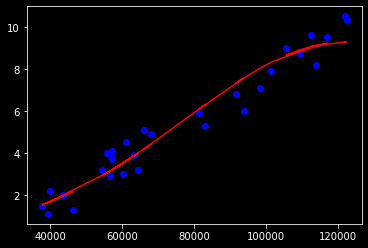

In [51]:
plt.scatter(dt.Salary,dt.YearsExperience,c="b")
plt.plot(dt.Salary,pred4,"r") 